In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import time
start = time.time() # 시작 시간 지정

In [3]:
# from sklearn.datasets import load_wine

# wine = load_wine()
# cancer_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
# X = wine.data
# y = wine.target

# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=2022)

sklearn의 유방암 데이터셋을 Boosting의 각 모델에 적용하여 결과값을 비교하였습니다.

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [6]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2022)

# AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

hyper parameter의 후보 값을 통해 최적의 hyper parameter 값을 찾았습니다.

In [9]:
param_ada = {"n_estimators": [10,50,100,1000],
             "learning_rate":[0.01,0.1,0.5]
             }

In [10]:
ada_model = AdaBoostClassifier(random_state=2022)
grid_ada = GridSearchCV(ada_model, param_grid=param_ada, cv=5)
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=2022),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 50, 100, 1000]})

In [11]:
print("최적의 hyper parameter:", grid_ada.best_params_)

최적의 hyper parameter: {'learning_rate': 0.1, 'n_estimators': 1000}


In [12]:
best_ada_model = AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=2022)
best_ada_model.fit(X_train, y_train)
y_pred = best_ada_model.predict(X_test)

print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

예측 정확도: 0.9736842105263158
Time: 26.01 seconds


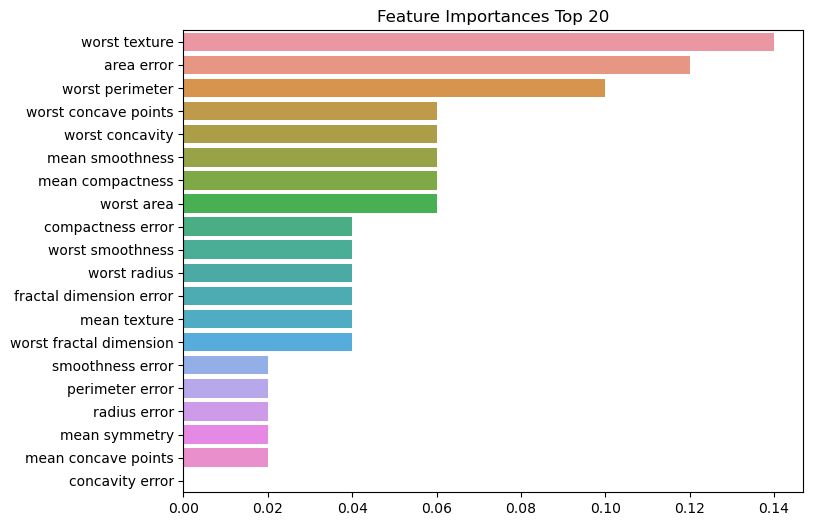

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = best_ada_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

### AdaBoost 실험결과

AdaBoost의 경우에는 예측 정확도는 0.97, 시간은 26초 정도 소요됐으며 변수 중요도를 측정할 때는 상위 3개 변수는 명확하게 구분한 것을 확인할 수 있지만 그 이외의 변수들은 그림과 같이 명확하게 순위를 구분하지 못한 것을 확인할 수 있습니다.

# GBM

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
param_gbm = {"max_depth" : [4,6,8,10],
             "learning_rate" : [0.001, 0.01,0.1],
             "n_estimators" : [10,100,1000]
              }

In [16]:
gbm_model = GradientBoostingClassifier(random_state=2022)
grid_gbm = GridSearchCV(gbm_model, param_grid=param_gbm, cv=5)
grid_gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2022),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [10, 100, 1000]})

In [17]:
print("최적의 hyper parameter:", grid_ada.best_params_)

최적의 hyper parameter: {'learning_rate': 0.1, 'n_estimators': 1000}


In [18]:
best_gbm_model = GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, random_state=2022)
best_gbm_model.fit(X_train, y_train)
y_pred = best_gbm_model.predict(X_test)

print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

예측 정확도: 0.9473684210526315
Time: 161.19 seconds


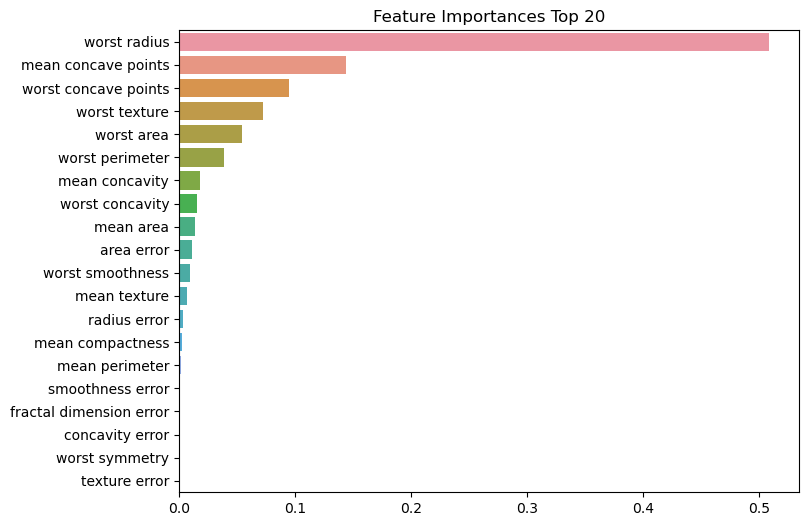

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = best_gbm_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

### GBM 실험결과

GBM의 경우 AdaBoost보다 오히려 정확도는 떨어지고 시간은 오래걸린  것을 확인할 수 있으며 AdaBoost와 다르게 변수 중요도의 경우 가장 중요한 변수의 중요도를 매우 높게 평가한 것을 확인할 수 있었습니다.

# XGBoost

In [20]:
import xgboost as xgb

In [21]:
start = time.time()
xgb_train = xgb.DMatrix(data=X_train, label=y_train)
xgb_test = xgb.DMatrix(data=X_test)

In [22]:
param_xgb = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [10,100,1000]
              } 

In [23]:
xgb_model = xgb.XGBClassifier(random_state=2022)
grid_xgb = GridSearchCV(xgb_model, param_grid=param_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

[00:45:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:45:14] WARNING:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2022, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6, 10],
                         'n_estimators': [10, 100, 1000]})

In [24]:
print("최적의 hyper parameter:", grid_xgb.best_params_)

최적의 hyper parameter: {'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}


In [25]:
best_xgb_model = xgb.XGBClassifier(max_depth=10, min_child_weight=1, n_estimators=100, random_state=2022)
best_xgb_model.fit(X_train, y_train)
y_pred = best_ada_model.predict(X_test)

print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[00:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
예측 정확도: 0.9736842105263158
Time: 11.58 seconds


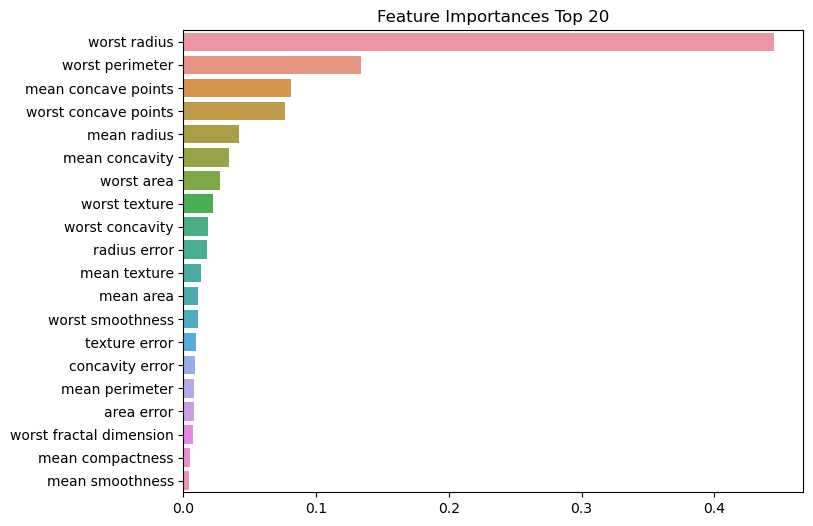

In [26]:
%matplotlib inline

feature_importances_values = best_xgb_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

### XGBoost 실험결과

XGBoost의 경우 이전 모델들과 다르게 시간은 가장 적게 소요되었으며 정확도는 오히려 높아진 것을 확인할 수 있습니다. 변수 중요도의 경우 GBM과 마찬가지로 첫번째 변수를 매우 높게 평가했지만 이외 하위 변수들도 어느정도 중요도를 부여한 것을 확인할 수 있습니다.

# LightGBM

In [27]:
import lightgbm as lgb

In [28]:
start = time.time()
lgb_train = lgb.Dataset(data=X_train, label=y_train)
lgb_test = lgb.Dataset(data=X_test, label=y_test)

In [29]:
param_lgb = {"max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,900,1200],
             "n_estimators" : [10, 100, 1000],
             "learning_rate" : [0.001,0.01,0.1]
              }

In [30]:
lgb_model = lgb.LGBMClassifier(random_state=2022)
grid_lgb = GridSearchCV(lgb_model, param_grid=param_lgb, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=2022),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [25, 50, 75],
                         'n_estimators': [10, 100, 1000],
                         'num_leaves': [100, 300, 900, 1200]})

In [31]:
print("최적의 hyper parameter:", grid_lgb.best_params_)

최적의 hyper parameter: {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 1000, 'num_leaves': 100}


In [32]:
best_lgb_model = lgb.LGBMClassifier(max_depth=25, learning_rate=0.01, num_leaves=100, n_estimators=1000, random_state=2022)
best_lgb_model.fit(X_train, y_train)
y_pred = best_lgb_model.predict(X_test)

print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

예측 정확도: 0.9649122807017544
Time: 48.25 seconds


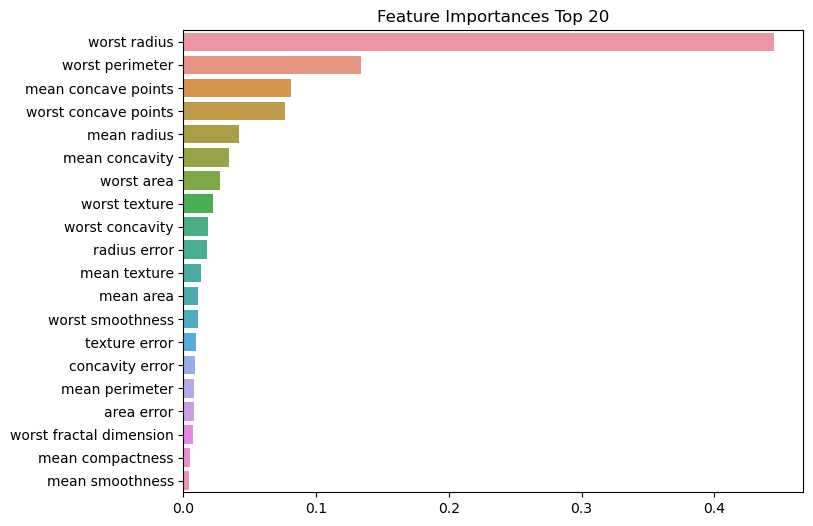

In [33]:
%matplotlib inline

feature_importances_values = best_xgb_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

### LightGBM 실험결과
LightGBM의 경우 앞선 XGBoost보다 정확도는 떨어졌지만 시간은 늘어난 것을 확인할 수 있습니다. 변수중요도의 경우 XGBoost와 매우 유사한 형태를 확인할 수 있습니다.

# CatBoost

In [34]:
import catboost as cb

데이터를 catboost에 맞게 변환

In [35]:
start = time.time()
cat_train = cb.Pool(data=X_train, label=y_train) 
cat_test = lgb.Dataset(data=X_test, label=y_test)

In [36]:
param_cat = {"depth" : [6,8,10],
          "iterations" : [10,30],
          "learning_rate" : [0.001, 0.01, 0.1], 
          "l2_leaf_reg" : [2,5,10,30]
          }

In [37]:
cat_model = cb.CatBoostClassifier(random_state=2022)
grid_cat = GridSearchCV(cat_model, param_grid=param_cat, cv=5)
grid_cat.fit(X_train, y_train)

0:	learn: 0.6914186	total: 149ms	remaining: 1.34s
1:	learn: 0.6897897	total: 150ms	remaining: 601ms
2:	learn: 0.6878827	total: 152ms	remaining: 354ms
3:	learn: 0.6860603	total: 153ms	remaining: 230ms
4:	learn: 0.6841578	total: 155ms	remaining: 155ms
5:	learn: 0.6822532	total: 157ms	remaining: 105ms
6:	learn: 0.6802888	total: 159ms	remaining: 68ms
7:	learn: 0.6783903	total: 160ms	remaining: 40.1ms
8:	learn: 0.6766282	total: 162ms	remaining: 18ms
9:	learn: 0.6748393	total: 164ms	remaining: 0us
0:	learn: 0.6914075	total: 2.69ms	remaining: 24.2ms
1:	learn: 0.6898224	total: 4.85ms	remaining: 19.4ms
2:	learn: 0.6882044	total: 7.59ms	remaining: 17.7ms
3:	learn: 0.6865120	total: 9.72ms	remaining: 14.6ms
4:	learn: 0.6847332	total: 12.1ms	remaining: 12.1ms
5:	learn: 0.6832692	total: 13.9ms	remaining: 9.3ms
6:	learn: 0.6816721	total: 16.1ms	remaining: 6.88ms
7:	learn: 0.6801547	total: 18ms	remaining: 4.51ms
8:	learn: 0.6785690	total: 19.9ms	remaining: 2.21ms
9:	learn: 0.6771408	total: 21.6ms	rema

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F72501D490>,
             param_grid={'depth': [6, 8, 10], 'iterations': [10, 30],
                         'l2_leaf_reg': [2, 5, 10, 30],
                         'learning_rate': [0.001, 0.01, 0.1]})

In [38]:
print("최적의 hyper parameter:", grid_cat.best_params_)

최적의 hyper parameter: {'depth': 6, 'iterations': 30, 'l2_leaf_reg': 2, 'learning_rate': 0.1}


In [40]:
best_cb_model = cb.CatBoostClassifier(max_depth=6, learning_rate=0.1, l2_leaf_reg=2, iterations=30, random_state=2022)
best_cb_model.fit(X_train, y_train)
y_pred = best_cb_model.predict(X_test)

print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

0:	learn: 0.5229237	total: 10.4ms	remaining: 302ms
1:	learn: 0.4237144	total: 14.7ms	remaining: 206ms
2:	learn: 0.3592401	total: 17.3ms	remaining: 156ms
3:	learn: 0.3008841	total: 19.4ms	remaining: 126ms
4:	learn: 0.2496744	total: 21.3ms	remaining: 106ms
5:	learn: 0.2192800	total: 23.3ms	remaining: 93.4ms
6:	learn: 0.1914589	total: 25.5ms	remaining: 83.9ms
7:	learn: 0.1586914	total: 27.7ms	remaining: 76.3ms
8:	learn: 0.1404624	total: 29.7ms	remaining: 69.2ms
9:	learn: 0.1252913	total: 31.7ms	remaining: 63.3ms
10:	learn: 0.1117135	total: 34.1ms	remaining: 58.9ms
11:	learn: 0.1009531	total: 36.3ms	remaining: 54.5ms
12:	learn: 0.0909592	total: 39.2ms	remaining: 51.3ms
13:	learn: 0.0805875	total: 41.4ms	remaining: 47.3ms
14:	learn: 0.0734976	total: 43.7ms	remaining: 43.7ms
15:	learn: 0.0699654	total: 46ms	remaining: 40.2ms
16:	learn: 0.0637426	total: 48.1ms	remaining: 36.8ms
17:	learn: 0.0587925	total: 50.4ms	remaining: 33.6ms
18:	learn: 0.0564463	total: 52.9ms	remaining: 30.7ms
19:	learn:

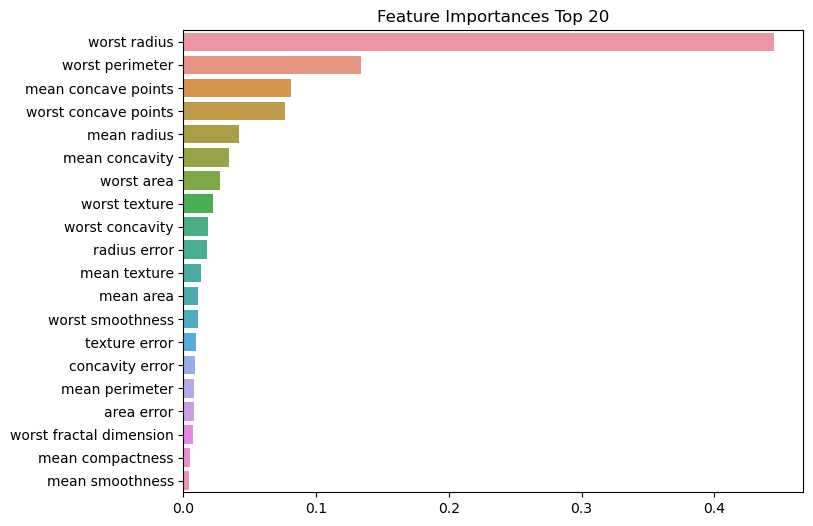

In [41]:
%matplotlib inline

feature_importances_values = best_xgb_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

### CatBoost 실험결과
CatBoost의 경우 시간이 11시간으로매우 오래 소요된 것을 확인할 수 있습니다. 그러나 정확도는 0.96정도로 앞선 모델보다 좋다고 할 수 없습니다. 범주형 변수에 특화된 모델이다 보니 이런 결과가 나온 것 같습니다.

In [42]:
# best 결과
print('XGB 파라미터: ', grid_ada.best_params_)
print(f'XGB 예측 정확도: {grid_ada.best_score_}')
print("="*30)
print('XGB 파라미터: ', grid_xgb.best_params_)
print(f'XGB 예측 정확도: {grid_xgb.best_score_}')
print("="*30)
print('LGB 파라미터: ', grid_lgb.best_params_)
print(f'LGB 예측 정확도:{grid_lgb.best_score_}')
print("="*30)
print('GBM 파라미터: ', grid_gbm.best_params_)
print(f'GBM 예측 정확도:{grid_gbm.best_score_}')
print("="*30)
print('CAT 파라미터: ', grid_cat.best_params_)
print(f'CAT 예측 정확도: {grid_cat.best_score_}')
print("="*30)

XGB 파라미터:  {'learning_rate': 0.1, 'n_estimators': 1000}
XGB 예측 정확도: 0.9714285714285715
XGB 파라미터:  {'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100}
XGB 예측 정확도: 0.9670329670329669
LGB 파라미터:  {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 1000, 'num_leaves': 100}
LGB 예측 정확도:0.9714285714285715
GBM 파라미터:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
GBM 예측 정확도:0.9516483516483518
CAT 파라미터:  {'depth': 6, 'iterations': 30, 'l2_leaf_reg': 2, 'learning_rate': 0.1}
CAT 예측 정확도: 0.9626373626373625


## 실험결과

예측정확도의 경우 XGBoost, LighGBM이 0.97로 가장 높았습니다. 그 뒤를 XGBoost,CatBoost가 이었으며 시간까지 고려했을 때 유방암 데이터셋의 경우 XGBoost가 가장 효율적이라고 볼 수 있습니다.